In [1]:
import sys
sys.path.append('../')

%matplotlib inline

from adic_graph import *

In [2]:
torch.set_default_dtype(torch.float64)

In [3]:
def visualize(graph, pos=None, node_size=350, edge_size=14, edge_label=True, undirected=True, font_size=12):
        
    if pos == None:
        n_nodes = graph.n_nodes
        
        if n_nodes%2 == 0:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}
        else:
            pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

    #ax = plt.figure(figsize=(3*graph.length,3))
    length = graph.length
    fig = plt.figure(figsize=(3*length + 1*(length-1), 3))
    grid = plt.GridSpec(1, 3*length + length-1)
    counter = 0
    
    options = {
        "font_size": font_size,
        "node_size": node_size,
        "node_color": "lightgray",
        "edgecolors": "black",
        "linewidths": 2,
        "width": 2.5,
    }
        
    for t in range(graph.length):
        #plt.subplot(1, graph.length, t+1)
        ax = fig.add_subplot(grid[0, counter:counter+3])
        
        if undirected:
            G = nx.Graph()
        else:
            G = nx.DiGraph()
        edge_labels = {}
                     
        for i in range(graph.n_nodes):
            G.add_node(str(i))
                
            for i in range(graph.n_nodes):
                for j in range(graph.n_nodes):
                    #if i > j:
                    if True:
                        if graph.w_list[t][i,j] > 0:
                            G.add_edge(str(i), str(j))
                            
                            """
                            # edge weight
                            if math.isclose(graph.w_list[t][i,j].item(), 0.5):    
                                pass
                                #edge_labels[(str(i), str(j))] = "1/2"
                            elif math.isclose(graph.w_list[t][i,j].item(), 2/3):
                                edge_labels[(str(i), str(j))] = "2/3"
                            elif math.isclose(graph.w_list[t][i,j].item(), 1/3):
                                edge_labels[(str(i), str(j))] = "1/3"
                            elif math.isclose(graph.w_list[t][i,j].item(), 4/5):
                                edge_labels[(str(i), str(j))] = "4/5"
                            elif math.isclose(graph.w_list[t][i,j].item(), 1/5):
                                edge_labels[(str(i), str(j))] = "1/5"
                            elif math.isclose(graph.w_list[t][i,j].item(), 8/9):
                                edge_labels[(str(i), str(j))] = "8/9"
                            elif math.isclose(graph.w_list[t][i,j].item(), 4/7):
                                edge_labels[(str(i), str(j))] = "4/7"
                            else:
                                edge_labels[(str(i), str(j))] = "??"
                            """
        ax = plt.gca()
        ax.margins(0.20)
        plt.axis("off")

        nx.draw(G, pos=pos, labels={str(i) : str(i+1) for i in range(graph.n_nodes)}, **options)
        
        if t != length-1:
            ax_arrow = fig.add_subplot(grid[0, counter+3:counter+4])
            
            #ax_arrow.plot([0, 1, 2], [2,3,4])
            ax_arrow.annotate("", xy=(1.0, 0), xytext=(0, 0), arrowprops=dict(facecolor='black',arrowstyle='-|>,head_width=0.75, head_length=0.75',lw=4))
            plt.ylim(-1, 1)
            plt.axis("off")
            counter += 4       
        if edge_label:
            nx.draw_networkx_edge_labels(
                G, pos,
                edge_labels,
                font_color='black',
                font_size=edge_size)

# HyperHyperCube

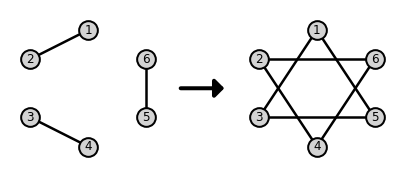

In [4]:
n_nodes = 6
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = HyperHyperCube(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_hyperhypercube_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

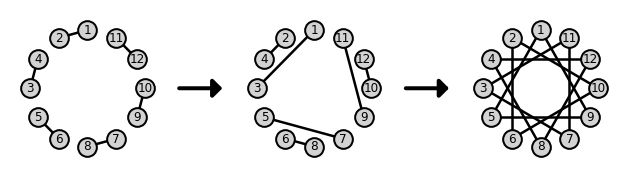

In [5]:
n_nodes = 12
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]
pos["10"], pos["11"] = pos["11"], pos["10"]

g = HyperHyperCube(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_hyperhypercube_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# ADIC Graph

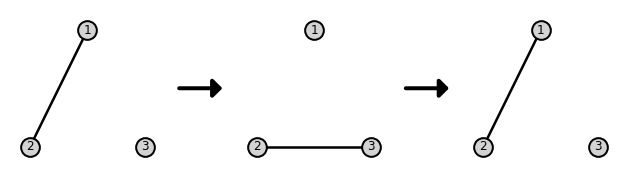

In [6]:
n_nodes = 3
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

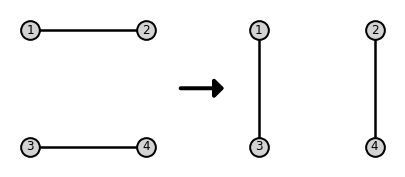

In [7]:
n_nodes = 4
max_degree = 1

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = AdicGraph(4, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

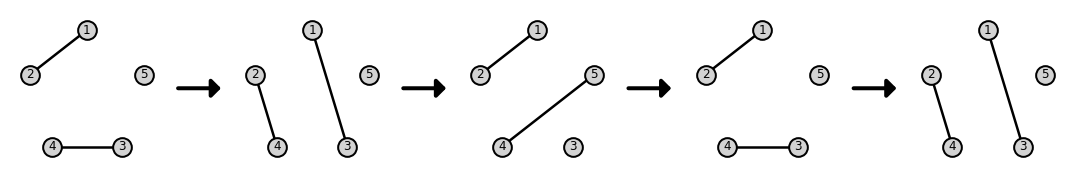

In [8]:
n_nodes = 5
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

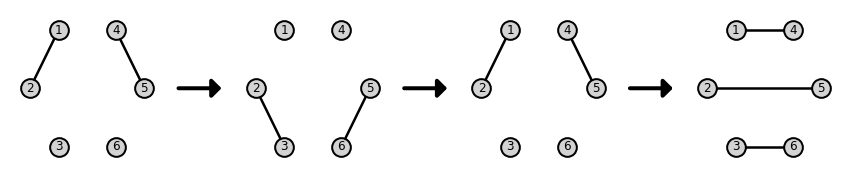

In [9]:
n_nodes = 6
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

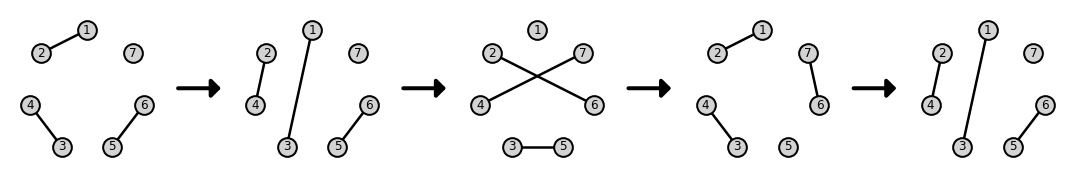

In [10]:
n_nodes = 7
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

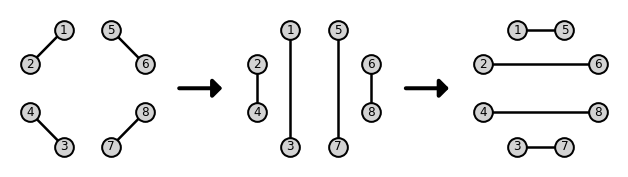

In [11]:
n_nodes = 8
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

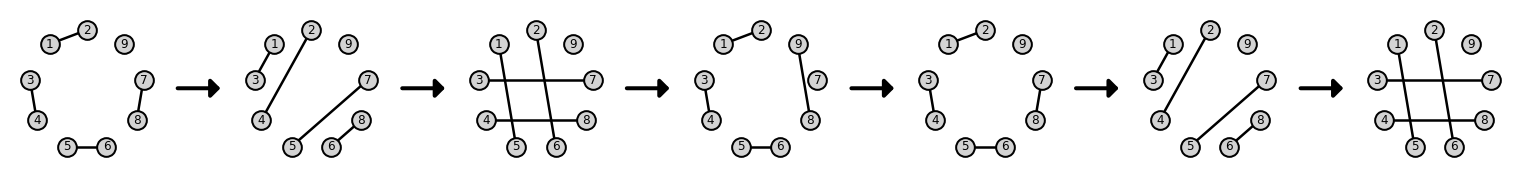

In [12]:
n_nodes = 9
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["0"], pos["1"] = pos["1"], pos["0"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

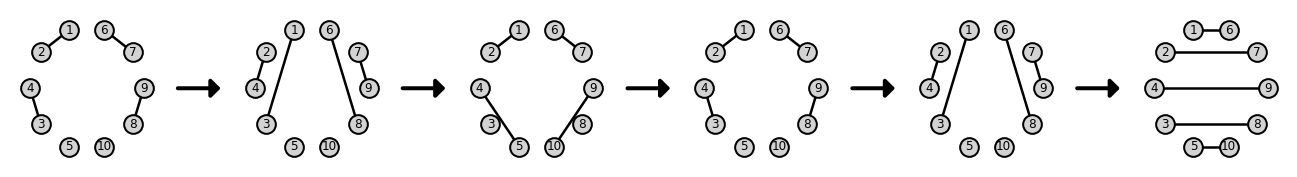

In [13]:
n_nodes = 10

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["2"], pos["3"] = pos["3"], pos["2"]
pos["5"], pos["6"], pos["7"], pos["8"], pos["9"] = pos["9"], pos["8"], pos["7"], pos["6"], pos["5"]
pos["8"], pos["7"] = pos["7"], pos["8"]

g = AdicGraph(n_nodes)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# Simple ADIC

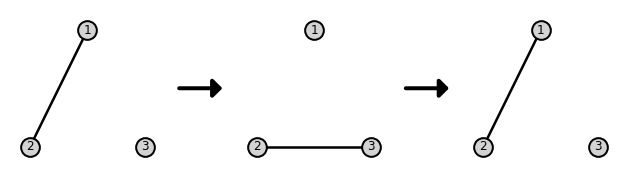

In [14]:
n_nodes = 3
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

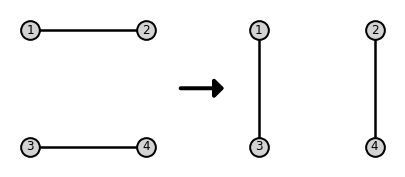

In [15]:
n_nodes = 4
max_degree = 1

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = SimpleAdicGraph(4, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

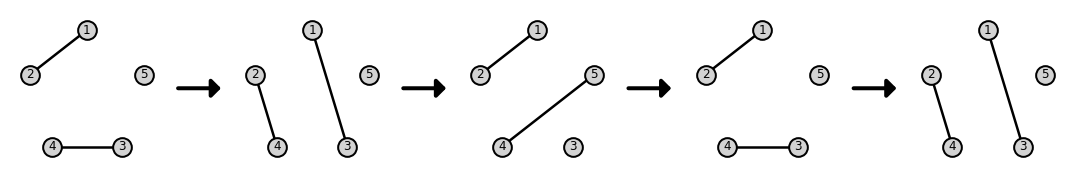

In [16]:
n_nodes = 5
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

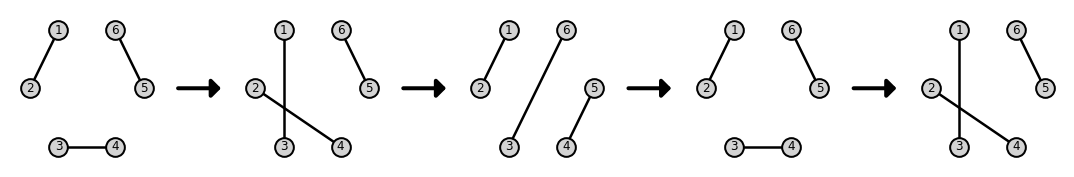

In [17]:
n_nodes = 6
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

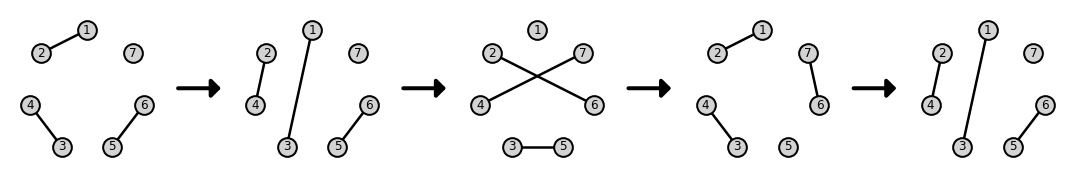

In [18]:
n_nodes = 7
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["3"], pos["2"] = pos["2"], pos["3"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

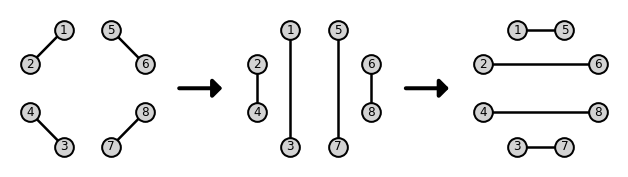

In [19]:
n_nodes = 8
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

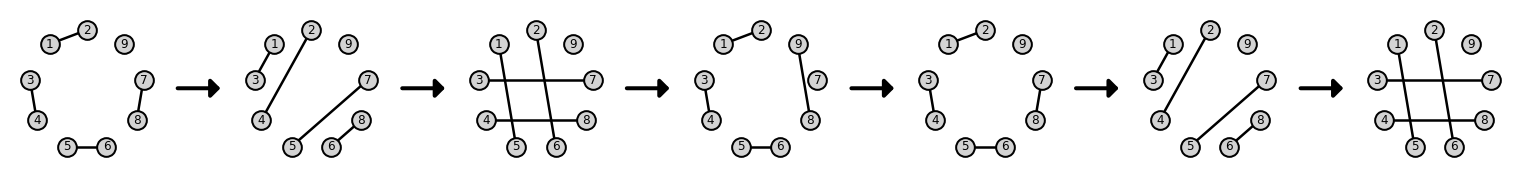

In [20]:
n_nodes = 9
max_degree = 1

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

pos["0"], pos["1"] = pos["1"], pos["0"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

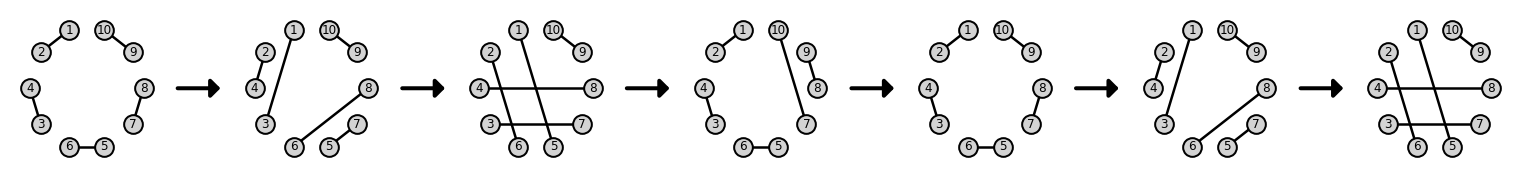

In [21]:
n_nodes = 10

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["2"], pos["3"] = pos["3"], pos["2"]
pos["4"], pos["5"] = pos["5"], pos["4"]


g = SimpleAdicGraph(n_nodes)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# 2-Peer ADIC

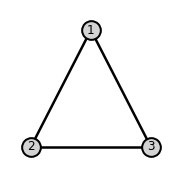

In [22]:
n_nodes = 3
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

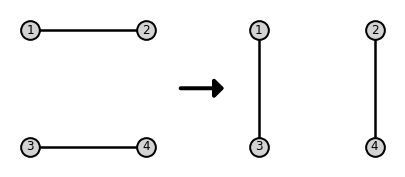

In [23]:
n_nodes = 4
max_degree = 2

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = AdicGraph(4, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

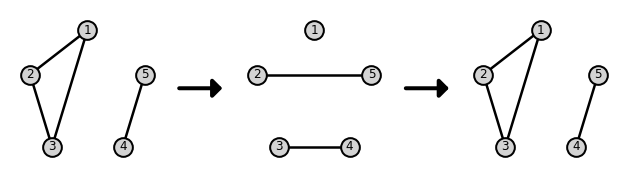

In [24]:
n_nodes = 5
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["3"], pos["2"] = pos["2"], pos["3"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

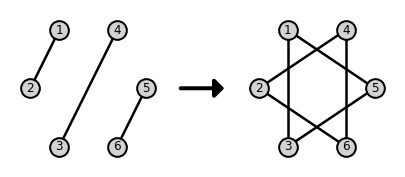

In [25]:
n_nodes = 6
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

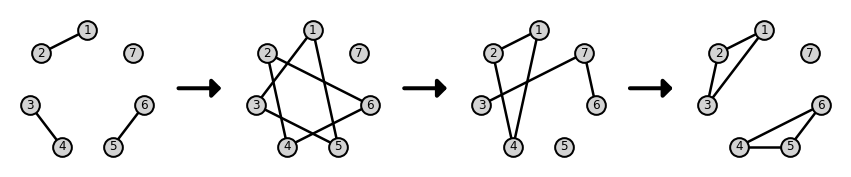

In [26]:
n_nodes = 7
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["3"], pos["2"] = pos["2"], pos["3"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

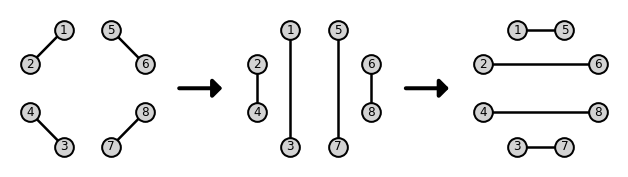

In [27]:
n_nodes = 8
max_degree = 2
pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

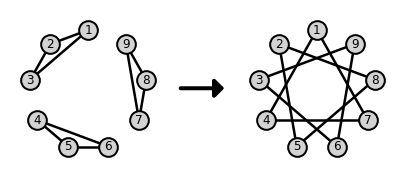

In [28]:
n_nodes = 9
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

#pos["0"], pos["1"] = pos["1"], pos["0"]
#pos["6"], pos["7"] = pos["7"], pos["6"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

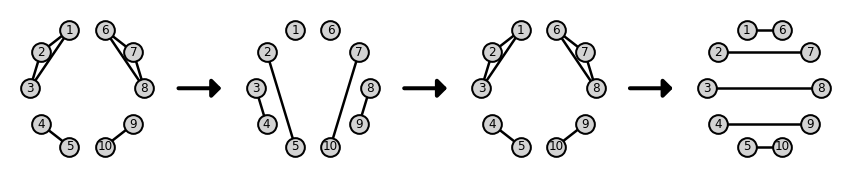

In [29]:
n_nodes = 10
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["5"], pos["6"], pos["7"], pos["8"], pos["9"] = pos["9"], pos["8"], pos["7"], pos["6"], pos["5"]

g = AdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_ADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

# 2-peer Simple ADIC

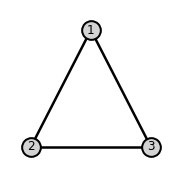

In [30]:
n_nodes = 3
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

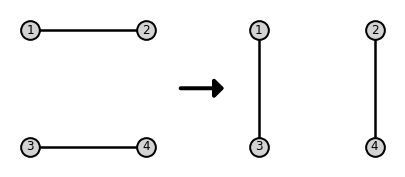

In [31]:
n_nodes = 4
max_degree = 2

pos = {"0": np.array([-0.5, 0.5]), "1": np.array([0.5, 0.5]), "3": np.array([0.5, -0.5]), "2": np.array([-0.5, -0.5])}
g = SimpleAdicGraph(4, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

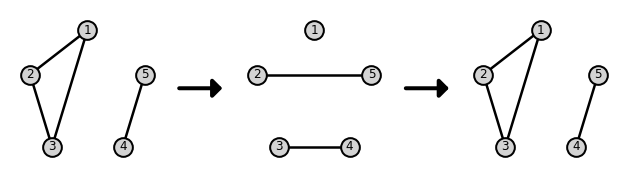

In [32]:
n_nodes = 5
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}


g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

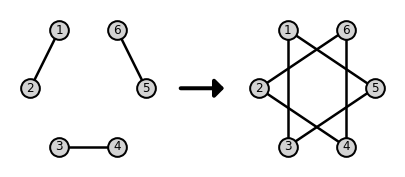

In [33]:
n_nodes = 6
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

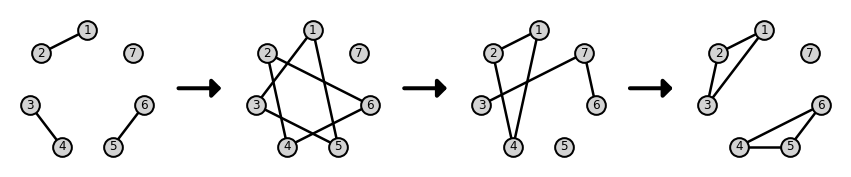

In [34]:
n_nodes = 7
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

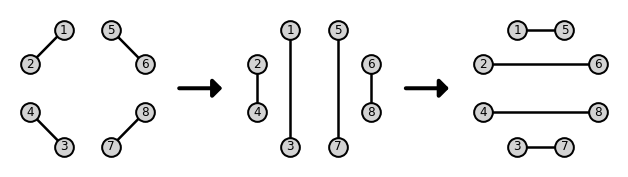

In [35]:
n_nodes = 8
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

pos["4"], pos["5"], pos["6"], pos["7"] = pos["7"], pos["6"], pos["5"], pos["4"]
pos["2"], pos["3"] = pos["3"], pos["2"]
pos["6"], pos["7"] = pos["7"], pos["6"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

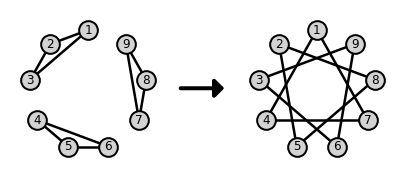

In [36]:
n_nodes = 9
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2), np.sin(2 * np.pi * n / n_nodes + np.pi/2)]) for n in range(n_nodes)}



g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

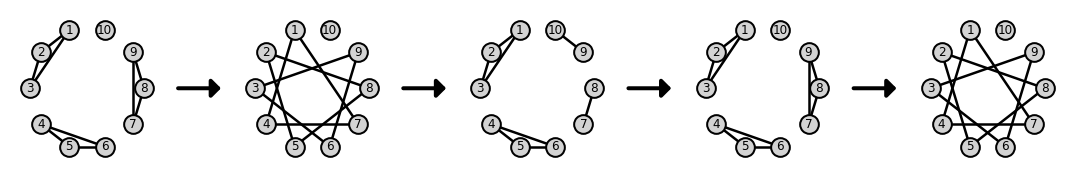

In [37]:
n_nodes = 10
max_degree = 2

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes)]) for n in range(n_nodes)}


g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos)
plt.savefig(f"../pic/{max_degree}_peer_SimpleADIC_{n_nodes}.pdf", bbox_inches='tight', dpi=75)

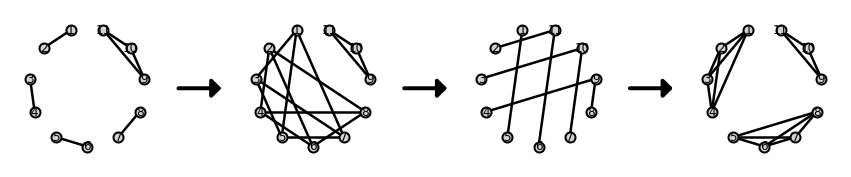

In [38]:
n_nodes = 8+3
max_degree = 3

pos = {str(n): 0.5*np.array([np.cos(2 * np.pi * n / n_nodes + np.pi/2 + np.pi/n_nodes), np.sin(2 * np.pi * n / n_nodes + np.pi/2  + np.pi/n_nodes)]) for n in range(n_nodes)}

#pos["3"], pos["4"], pos["5"] = pos["5"], pos["4"], pos["3"]

g = SimpleAdicGraph(n_nodes, max_degree=max_degree)
visualize(g, pos, node_size=100)
